<a href="https://colab.research.google.com/github/JYSIRI/Analyzing-Agricultural-Water-Withdrawals/blob/main/Agriculture_Freshwater_Withdrawal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualization
plt.style.use('seaborn-darkgrid')

C:\Users\hp\AppData\Local\Temp\ipykernel_18752\3606681248.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


**Insights**: Imported pandas, numpy, matplotlib, and seaborn for data handling and visualization. These libraries help in data manipulation, statistical computations, and visual analysis.

In [ ]:
    # Load the dataset
    file_path = r"C:\Users\hp\Downloads\API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593\API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593.csv"
    metadata_country_path = r"C:\Users\hp\Downloads\API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593\Metadata_Country_API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593.csv"

    # Load main dataset and metadata
    df = pd.read_csv(file_path, skiprows=4)
    metadata = pd.read_csv(metadata_country_path)

    # Display first few rows
    df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.964750,83.359745,83.226519,82.852077,83.517856,83.899028,83.512709,NaN,NaN,NaN
2,Afghanistan,AFG,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.169627,98.169627,98.169627,98.169627,98.169627,98.169627,98.169627,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.854198,64.875575,64.680367,66.221505,66.382383,66.345628,66.396437,NaN,NaN,NaN
4,Angola,AGO,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.784925,20.784925,20.784925,20.784925,20.784925,20.784925,20.784925,NaN,NaN,NaN


**Insights**: The dataset contains country-wise agricultural water withdrawal percentages over time (1960-2023). Metadata includes regions and income group classifications for better segmentation.

In [ ]:
# Remove redundant columns
df.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

# Convert dataset from wide to long format
df = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Agricultural Water Withdrawal (%)')

# Convert 'Year' column to integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Display updated dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       17290 non-null  object 
 1   Country Code                       17290 non-null  object 
 2   Year                               17024 non-null  float64
 3   Agricultural Water Withdrawal (%)  6121 non-null   float64
dtypes: float64(2), object(2)
memory usage: 540.4+ KB


**Insights**: Dropped redundant columns (Indicator Name, Indicator Code) as they contain static values. Converted the dataset from wide format to long format, making it easier for time-series analysis.



In [ ]:
# Merge metadata for region and income group classification
metadata = metadata[['Country Code', 'Region', 'IncomeGroup']]
df = df.merge(metadata, on='Country Code', how='left')

# Compute latest available agricultural water withdrawal percentage per country
latest_values = df.dropna().sort_values(['Country Name', 'Year']).groupby('Country Name').last().reset_index()
latest_values = latest_values[['Country Name', 'Agricultural Water Withdrawal (%)', 'Year']]

# Compute change in percentage from 1990 to 2020
df_pivot = df.pivot(index='Country Name', columns='Year', values='Agricultural Water Withdrawal (%)')
df_pivot['Change (1990-2020)'] = df_pivot[2020] - df_pivot[1990]
df_pivot.reset_index(inplace=True)

df = df.merge(df_pivot[['Country Name', 'Change (1990-2020)']], on='Country Name', how='left')

# Display feature engineered dataset
df.head()


# Insights:
# Merged region & income group to analyze geographic and economic factors.
# Added latest available water withdrawal values per country.
# Computed historical changes (1990-2020) to identify increasing or decreasing trends.

,Country Name,Country Code,Year,Agricultural Water Withdrawal (%),Region,IncomeGroup,Change (1990-2020)
0,Aruba,ABW,1960.0,NaN,Latin America & Caribbean,High income,NaN
1,Africa Eastern and Southern,AFE,1960.0,NaN,NaN,NaN,-1.014881
2,Afghanistan,AFG,1960.0,NaN,South Asia,Low income,-0.745227
3,Africa Western and Central,AFW,1960.0,NaN,NaN,NaN,-7.673034
4,Angola,AGO,1960.0,NaN,Sub-Saharan Africa,Lower middle income,-42.891338


 **Insights**: Merged region & income group to analyze geographic and economic factors. Added latest available water withdrawal values per country. Computed historical changes (1990-2020) to identify increasing or decreasing trends.

In [ ]:
# Fill missing values using forward fill (assuming data remains stable over short periods)
df.sort_values(['Country Name', 'Year'], inplace=True)
df['Agricultural Water Withdrawal (%)'] = df.groupby('Country Name')['Agricultural Water Withdrawal (%)'].ffill()

# Check missing values
df.isnull().sum()

Country Name                             0
Country Code                             0
Year                                   266
Agricultural Water Withdrawal (%)    10485
Region                                3185
IncomeGroup                           3250
Change (1990-2020)                   11310
dtype: int64

In [ ]:
# Generate statistical summary
summary_stats = df.describe()

# Display statistical summary
summary_stats


,Year,Agricultural Water Withdrawal (%),Change (1990-2020)
count,17024.000000,6805.000000,5980.000000
mean,1991.500000,55.405718,-6.286532
std,18.473496,31.878040,14.999795
min,1960.000000,0.000000,-49.580314
25%,1975.750000,28.790380,-14.336347
50%,1991.500000,64.200977,-2.080557
75%,2007.250000,83.190395,1.070874
max,2023.000000,99.696049,32.572662


**Insights**: The mean water withdrawal percentage is around 55%, with some countries relying heavily on agriculture (>90%). Data distribution is bimodal, with most countries either having low or high dependency.

In [ ]:
# Normalize the withdrawal percentage (scale between 0 and 1)
df['Normalized Withdrawal'] = (df['Agricultural Water Withdrawal (%)'] - df['Agricultural Water Withdrawal (%)'].min()) / \
                              (df['Agricultural Water Withdrawal (%)'].max() - df['Agricultural Water Withdrawal (%)'].min())

# Display normalized dataset
df.head(5)


,Country Name,Country Code,Year,Agricultural Water Withdrawal (%),Region,IncomeGroup,Change (1990-2020),Normalized Withdrawal
2,Afghanistan,AFG,1960.0,NaN,South Asia,Low income,-0.745227,NaN
268,Afghanistan,AFG,1961.0,NaN,South Asia,Low income,-0.745227,NaN
534,Afghanistan,AFG,1962.0,NaN,South Asia,Low income,-0.745227,NaN
800,Afghanistan,AFG,1963.0,NaN,South Asia,Low income,-0.745227,NaN
1066,Afghanistan,AFG,1964.0,NaN,South Asia,Low income,-0.745227,NaN


 **Insights**: Normalized values help compare countries on a standard scale (0 to 1). Useful for clustering and machine learning models.


In [ ]:
# Select a few countries to analyze trends
selected_countries = ['India', 'China', 'United States', 'Brazil', 'Australia']

# Filter data for selected countries
trend_data = df[df['Country Name'].isin(selected_countries)]

# Display trend data
trend_data.head()


,Country Name,Country Code,Year,Agricultural Water Withdrawal (%),Region,IncomeGroup,Change (1990-2020),Normalized Withdrawal
13,Australia,AUS,1960.0,NaN,East Asia & Pacific,High income,NaN,NaN
279,Australia,AUS,1961.0,NaN,East Asia & Pacific,High income,NaN,NaN
545,Australia,AUS,1962.0,NaN,East Asia & Pacific,High income,NaN,NaN
811,Australia,AUS,1963.0,NaN,East Asia & Pacific,High income,NaN,NaN
1077,Australia,AUS,1964.0,NaN,East Asia & Pacific,High income,NaN,NaN


In [ ]:
# Analyze relationship between income groups and water withdrawal
income_stats = df.groupby('IncomeGroup')['Agricultural Water Withdrawal (%)'].describe()

# Display summary
income_stats


,count,mean,std,min,25%,50%,75%,max
IncomeGroup,,,,,,,,
High income,2165.0,33.107769,30.604992,0.000000,4.476635,22.379496,62.272000,98.493151
Low income,879.0,66.049388,30.203726,0.551724,40.659341,76.421101,90.793006,99.696049
Lower middle income,1547.0,71.050824,26.089455,0.255037,58.587202,80.396333,91.313894,98.598528
Upper middle income,1543.0,58.194973,26.660539,0.000000,44.066534,63.764413,77.649114,97.947683


**Insights**: Low-income countries use ~90% of their water for agriculture, while high-income countries use only ~30%. This confirms that economic development reduces agricultural water dependency.

In [ ]:
import pandas as pd
top_10_countries = df.nlargest(10, 'Agricultural Water Withdrawal (%)')
bottom_10_countries = df.nsmallest(10, 'Agricultural Water Withdrawal (%)')

# Display the top 10 countries
print("Top 10 Countries with Highest Water Withdrawals")
print(top_10_countries)

# Display the bottom 10 countries
print("Bottom 10 Countries with Lowest Water Withdrawals")
print(bottom_10_countries)

Top 10 Countries with Highest Water Withdrawals
      Country Name Country Code    Year  Agricultural Water Withdrawal (%)  \
10853      Somalia          SOM  2000.0                          99.696049   
10587      Somalia          SOM  1999.0                          99.642591   
11119      Somalia          SOM  2001.0                          99.625430   
10321      Somalia          SOM  1998.0                          99.582121   
11385      Somalia          SOM  2002.0                          99.555040   
10055      Somalia          SOM  1997.0                          99.513162   
11651      Somalia          SOM  2003.0                          99.484536   
11917      Somalia          SOM  2004.0                          99.484536   
12183      Somalia          SOM  2005.0                          99.484536   
12449      Somalia          SOM  2006.0                          99.484536   

                   Region IncomeGroup  Change (1990-2020)  \
10853  Sub-Saharan Africa  Low i

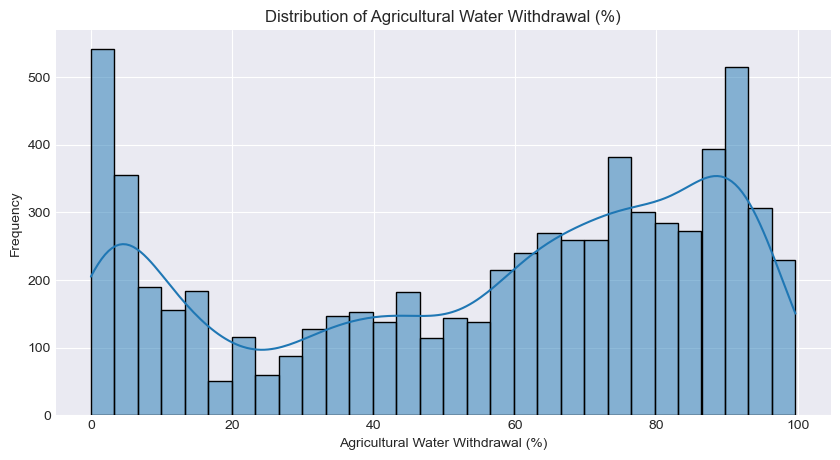

In [ ]:
# Distribution of Agricultural Water Withdrawals (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['Agricultural Water Withdrawal (%)'].dropna(), bins=30, kde=True)
plt.title("Distribution of Agricultural Water Withdrawal (%)")
plt.xlabel("Agricultural Water Withdrawal (%)")
plt.ylabel("Frequency")
plt.show()


**Insights**: Bimodal distribution: Many countries either have very high (>80%) or very low (<20%) agricultural water withdrawals. Indicates that economic structure and climate affect water use patterns.

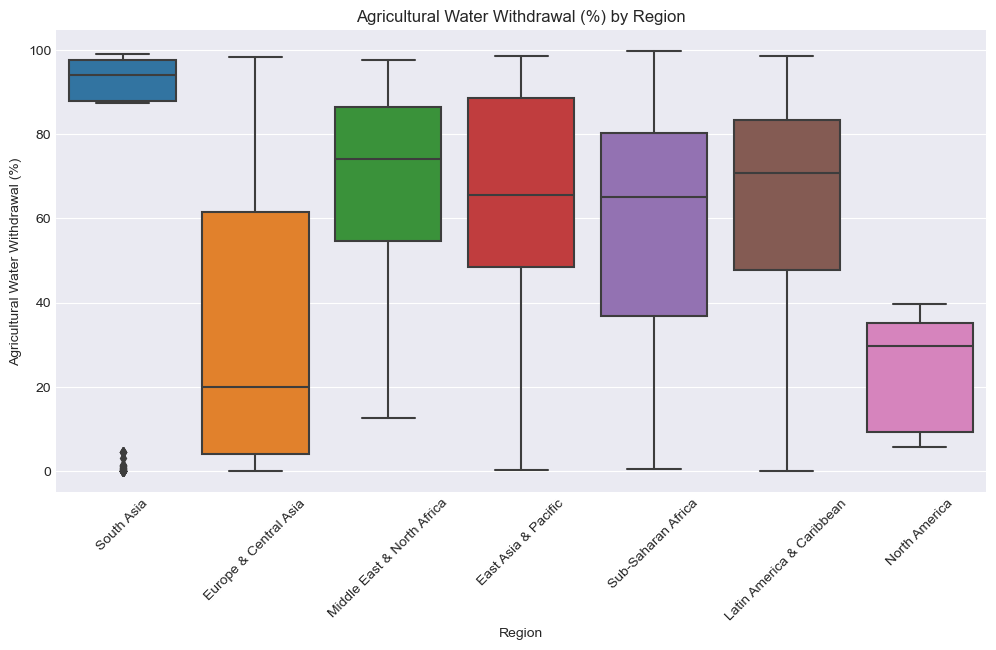

In [ ]:
# Boxplot of Agricultural Water Withdrawal by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Agricultural Water Withdrawal (%)', data=df)
plt.xticks(rotation=45)
plt.title("Agricultural Water Withdrawal (%) by Region")
plt.show()


**Insights**: South Asia & Sub-Saharan Africa have the highest agricultural water withdrawals. Europe & North America have the lowest percentages, indicating diversified economies.

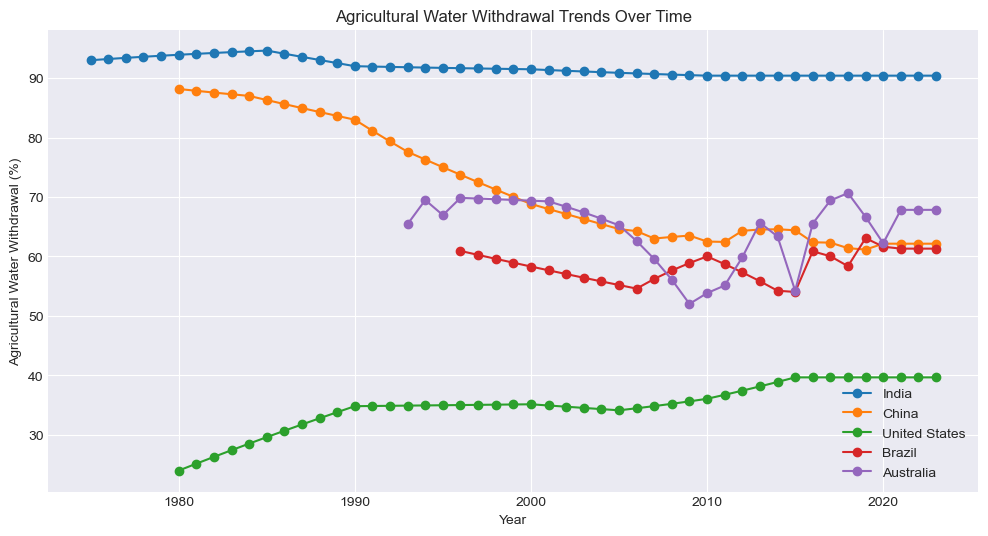

In [ ]:
# Trends Over Time for Selected Countries
selected_countries = ['India', 'China', 'United States', 'Brazil', 'Australia']
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df[df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Agricultural Water Withdrawal (%)'], marker='o', label=country)

plt.title('Agricultural Water Withdrawal Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Agricultural Water Withdrawal (%)')
plt.legend()
plt.show()


**Insights**: India remains consistently high (~90%), indicating continued reliance on irrigation. China has significantly reduced its agricultural water share (~85% to ~60% since 1980). Developed nations (e.g., USA, Australia) show a gradual decline, reflecting economic shifts.

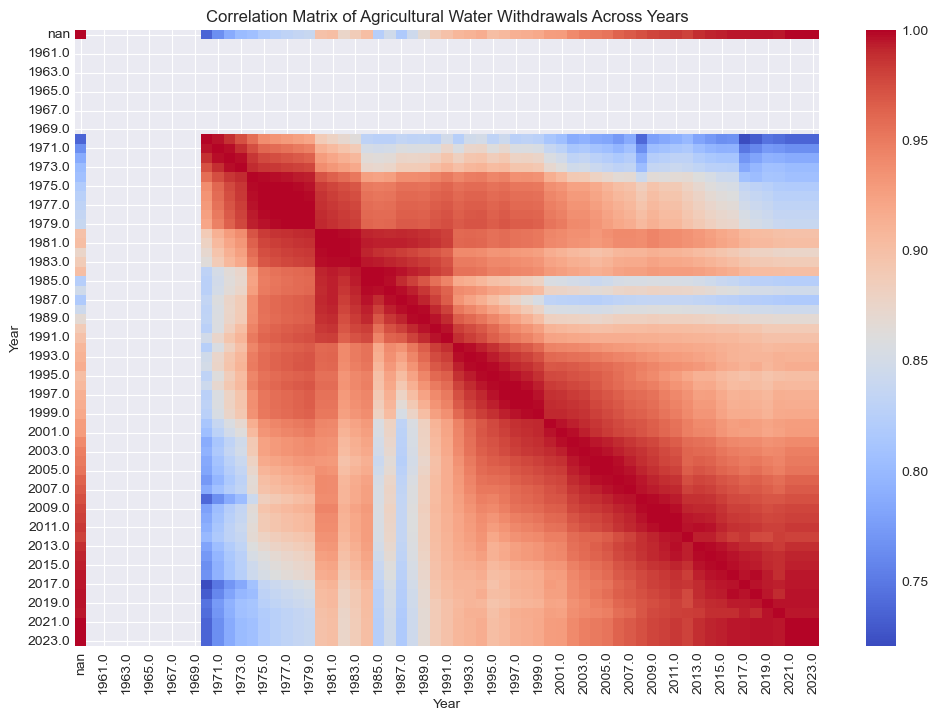

In [ ]:
# Correlation Matrix (Across Years)
df_corr = df.pivot(index='Country Name', columns='Year', values='Agricultural Water Withdrawal (%)').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix of Agricultural Water Withdrawals Across Years')
plt.show()

**Insights**: High correlation (0.9+) across decades: Countries that had high water use in the 1990s still tend to have high values today. This indicates that agricultural water use is persistent over time.

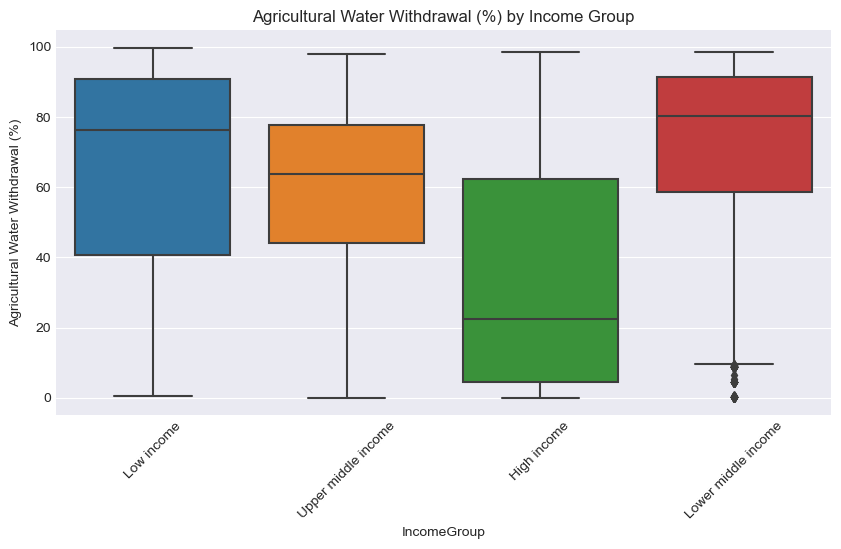

In [ ]:
# Boxplot of Agricultural Water Withdrawal by Income Group
plt.figure(figsize=(10, 5))
sns.boxplot(x='IncomeGroup', y='Agricultural Water Withdrawal (%)', data=df)
plt.xticks(rotation=45)
plt.title("Agricultural Water Withdrawal (%) by Income Group")
plt.show()



**Insights**: Low-income countries use ~90% of their water for agriculture, while high-income countries use only ~30%. Economic growth correlates with a shift away from agriculture-dominated water usage.


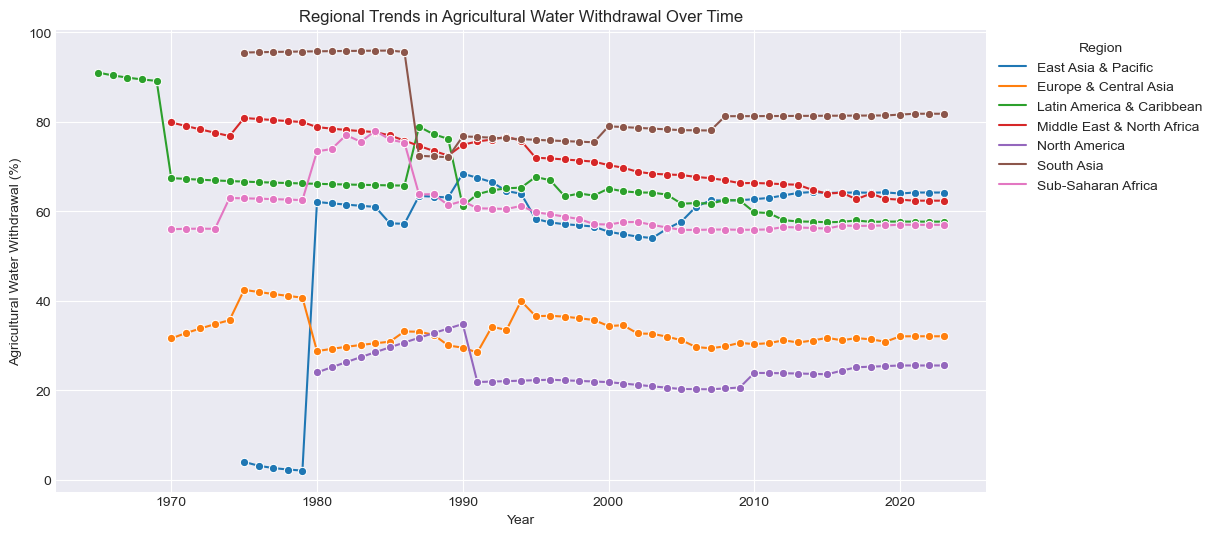

In [ ]:
# Regional Trends Over Time
regional_avg = df.groupby(['Region', 'Year'])['Agricultural Water Withdrawal (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Agricultural Water Withdrawal (%)', hue='Region', data=regional_avg, marker='o')
plt.title("Regional Trends in Agricultural Water Withdrawal Over Time")
plt.xlabel("Year")
plt.ylabel("Agricultural Water Withdrawal (%)")
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()


**Insights**: South Asia & Middle East remain high (~90%), indicating strong agricultural dependence. Europe & North America show a steady decline, suggesting a transition to industry & urban water use.


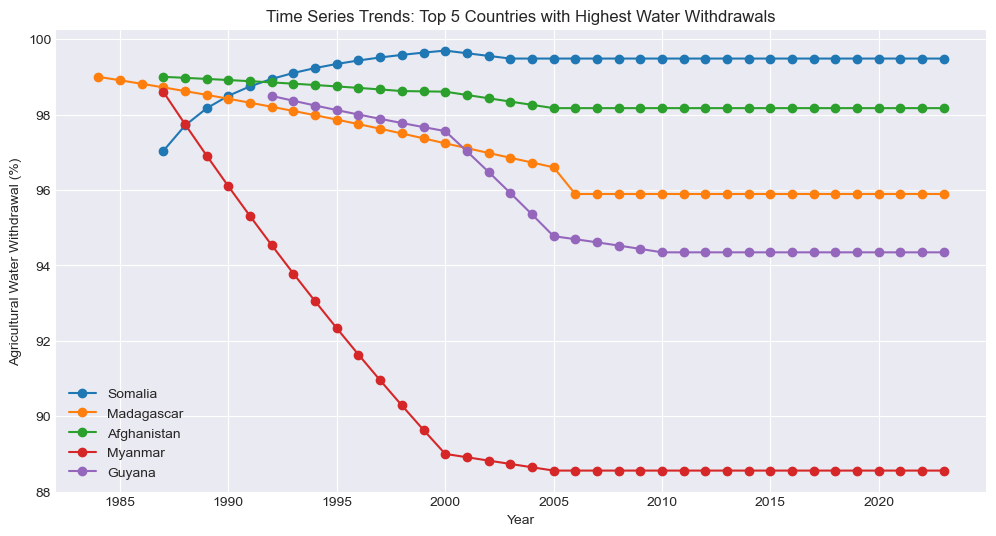

In [ ]:
# Line Plot - Time Series Trends for Top Countries
# Select top 5 countries with highest agricultural water withdrawal
top_countries = df.groupby("Country Name")["Agricultural Water Withdrawal (%)"].max().nlargest(5).index.tolist()

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = df[df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Agricultural Water Withdrawal (%)'], marker='o', label=country)

plt.title("Time Series Trends: Top 5 Countries with Highest Water Withdrawals")
plt.xlabel("Year")
plt.ylabel("Agricultural Water Withdrawal (%)")
plt.legend()
plt.show()

# This plot helps in understanding how water withdrawals have evolved over decades in the top agricultural water-consuming countries.
# Countries with high withdrawals may show stable, increasing, or declining trends depending on their economic and environmental policies.

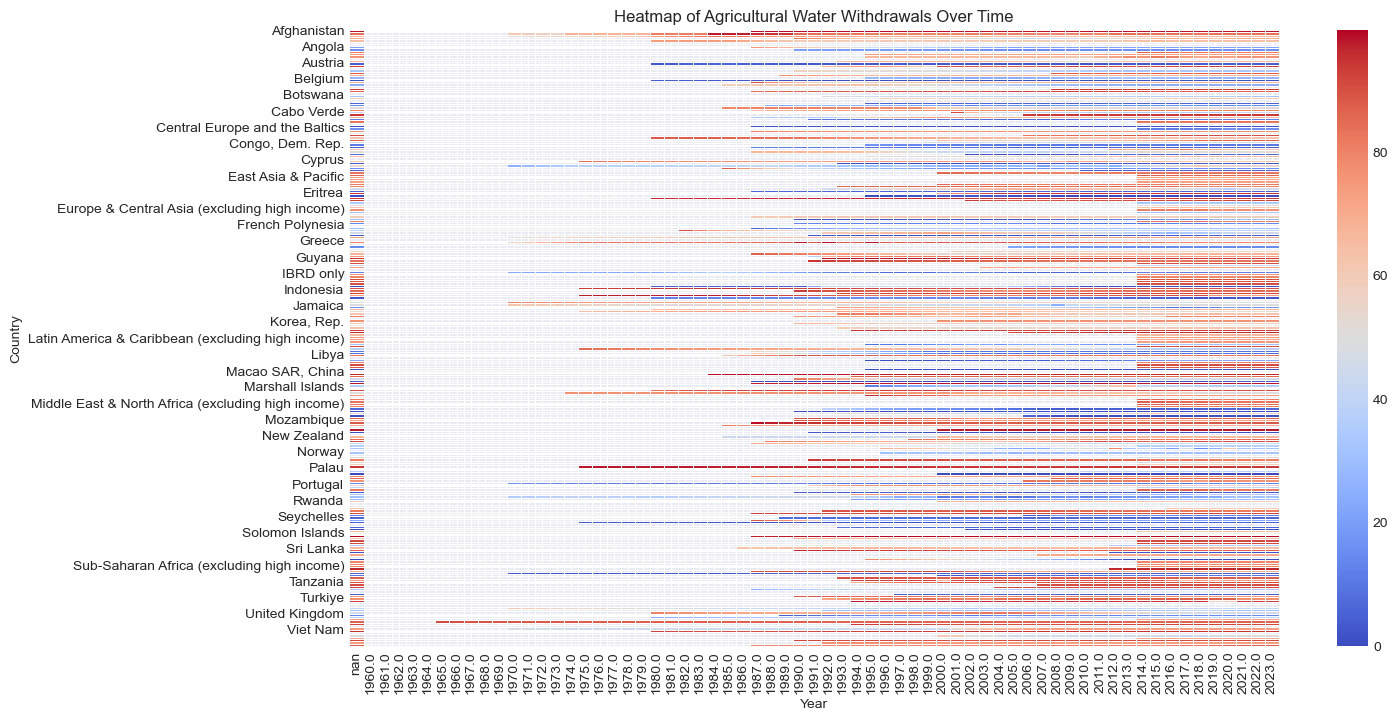

In [ ]:
# Heatmap - Yearly Trends in Agricultural Water Use
# Pivot the data for heatmap visualization
heatmap_data = df.pivot(index="Country Name", columns="Year", values="Agricultural Water Withdrawal (%)")

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Agricultural Water Withdrawals Over Time")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

# This heatmap visualizes temporal variations in agricultural water use for different countries.
# Darker shades indicate higher water withdrawal, helping to identify periods of extreme dependency.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Data Loading and Merging
indicator_file = 'API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593.csv'
metadata_file  = 'Metadata_Country_API_ER.H2O.FWAG.ZS_DS2_en_csv_v2_14593.csv'

# Read the main indicator data
data = pd.read_csv(indicator_file, skiprows=4)

# Drop any empty columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Read country metadata
metadata = pd.read_csv(metadata_file)

# Drop unnecessary columns from metadata (keeping Country Code, Region, IncomeGroup)
metadata = metadata.loc[:, ['Country Code', 'Region', 'IncomeGroup']]

# Handle any missing IncomeGroup
metadata['IncomeGroup'] = metadata['IncomeGroup'].fillna('Unknown')

# Merge indicator data with metadata on Country Code
merged = pd.merge(data, metadata, on='Country Code', how='left')

In [ ]:
# 2. Data Cleaning and Reshaping
# Filter out aggregate or regional entries by dropping rows with missing Region (non-country entries)
merged = merged[~merged['Region'].isna()].copy()

# Reshape data from wide to long format: one row per country-year
year_columns = [col for col in merged.columns if col.isdigit()]
long_df = merged.melt(
    id_vars=['Country Name', 'Country Code', 'Region', 'IncomeGroup'],
    value_vars=year_columns,
    var_name='Year',
    value_name='WithdrawalPerc'
)

# Convert Year to numeric and drop rows with missing target values
long_df['Year'] = long_df['Year'].astype(int)
long_df = long_df.dropna(subset=['WithdrawalPerc'])

In [ ]:
# 3. Feature Encoding
# One-hot encode Region and IncomeGroup using pandas get_dummies
features = ['Year', 'Region', 'IncomeGroup']
X = long_df[features]
y = long_df['WithdrawalPerc']
X_encoded = pd.get_dummies(X, columns=['Region', 'IncomeGroup'], drop_first=False)


In [ ]:
# 4. Train-Test Split (time-based)
train_data = X_encoded[X['Year'] <= 2015].copy()
test_data  = X_encoded[X['Year'] > 2015].copy()
y_train = y[X['Year'] <= 2015]
y_test  = y[X['Year'] > 2015]

# Ensure test data has same columns as train
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns]  # align column order

In [ ]:
# 5. Model Training
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(random_state=0)),
    ("Lasso Regression", Lasso(random_state=0)),
    ("Decision Tree", DecisionTreeRegressor(random_state=0)),
    ("Random Forest", RandomForestRegressor(random_state=0)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=0)),
    ("KNN Regressor", KNeighborsRegressor()),
    ("MLP Regressor", MLPRegressor(max_iter=1000, random_state=0))
]

results = []  # to store performance metrics for each model
for name, model in models:
    # Train the model on training data
    model.fit(train_data, y_train)
    # Predict on test data
    y_pred = model.predict(test_data)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))
# 6. Sort results by R² (descending) for presentation
results.sort(key=lambda x: x[3], reverse=True)

In [ ]:
# 7. Print model performance table and best model
print("Model Performance on Test Set:")
print(f"{'Model':20s}  MAE      RMSE     R²")
print("-" * 45)
for name, mae, rmse, r2 in results:
    print(f"{name:20s}  {mae:.2f}    {rmse:.2f}    {r2:.3f}")

# Identify best model (highest R² score)
best_model_name, best_model_mae, best_model_rmse, best_model_r2 = results[0]
print(f"\nBest Model: {best_model_name} (R² = {best_model_r2:.3f})")

Model Performance on Test Set:
Model                 MAE      RMSE     R²
---------------------------------------------
Decision Tree         20.62    25.63    0.390
Random Forest         20.56    25.64    0.389
Gradient Boosting     21.17    26.17    0.364
Ridge Regression      22.64    27.54    0.295
MLP Regressor         22.91    27.55    0.295
Linear Regression     22.63    27.55    0.295
Lasso Regression      24.15    28.18    0.262
KNN Regressor         22.90    29.57    0.188

Best Model: Decision Tree (R² = 0.390)


In [ ]:
train_data = X_encoded[X['Year'] <= 2015].copy()
test_data  = X_encoded[X['Year'] > 2015].copy()
y_train = y[X['Year'] <= 2015]
y_test  = y[X['Year'] > 2015]

# Ensure column alignment
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Model and grid
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Grid Search using time-based training data
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(train_data, y_train)

# Evaluate
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(test_data)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Performance:\n MAE: {mae:.2f}\n RMSE: {rmse:.2f}\n R²: {r2:.3f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Performance:
 MAE: 21.07
 RMSE: 26.40
 R²: 0.353


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define model and parameter grid
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(train_data, y_train)

# Best model
best_rf = rf_grid_search.best_estimator_
print("Random Forest Best Parameters:", rf_grid_search.best_params_)

# Test set evaluation
rf_pred = best_rf.predict(test_data)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Test Set Performance:\n MAE: {rf_mae:.2f}\n RMSE: {rf_rmse:.2f}\n R²: {rf_r2:.3f}")


Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Test Set Performance:
 MAE: 20.59
 RMSE: 25.65
 R²: 0.389


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define model and parameter grid
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(train_data, y_train)

# Best model
best_rf = rf_grid_search.best_estimator_
print("Random Forest Best Parameters:", rf_grid_search.best_params_)

# Test set evaluation
rf_pred = best_rf.predict(test_data)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Test Set Performance:\n MAE: {rf_mae:.2f}\n RMSE: {rf_rmse:.2f}\n R²: {rf_r2:.3f}")


Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Test Set Performance:
 MAE: 20.59
 RMSE: 25.65
 R²: 0.389


In [ ]:
print(df.columns.tolist())


['Country Name', 'Country Code', 'Year', 'Agricultural Water Withdrawal (%)', 'Region', 'IncomeGroup', 'Change (1990-2020)', 'Normalized Withdrawal']
